# Solving the n-Queens Problem using Local Search

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


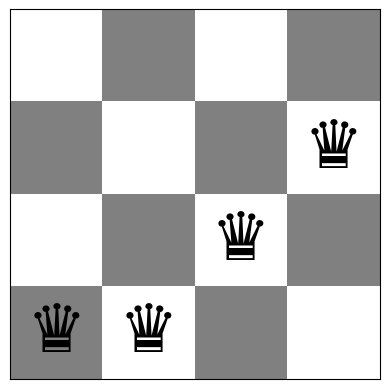

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


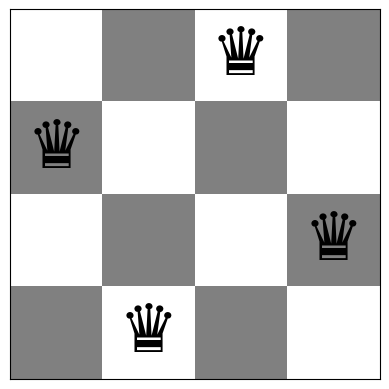

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

In [31]:
def visualize_board(state):
    """In bàn cờ với quân hậu"""
    n = len(state)
    board = []
    for row in range(n):
        line = ""
        for col in range(n):
            if state[row] == col:
                line += " Q "
            else:
                line += " . "
        board.append(line)
    print("\n".join(board))
    print()


## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

Steepest-ascent HC, Conflicts: 2
Board with 2 conflicts.


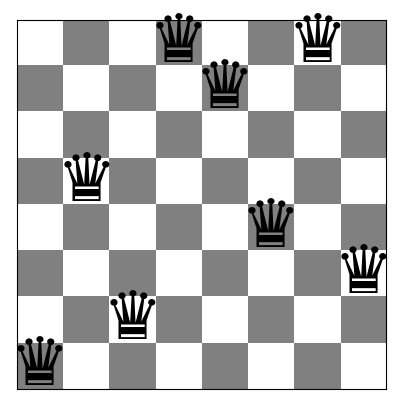

In [ ]:
import numpy as np
import random

def generate_neighbors(board):
    """Tạo tất cả các trạng thái lân cận có thể bằng cách di chuyển một quân hậu trong cột của nó."""
    n = len(board)
    neighbors = []
    for col in range(n):
        for row in range(n):
            if row != board[col]:
                new_board = list(board)
                new_board[col] = row
                neighbors.append(new_board)
    return neighbors

def steepest_ascent_hill_climbing(n, max_iter=1000):
    board = random_board(n)
    for _ in range(max_iter):
        current_conflicts = conflicts(board)
        neighbors = generate_neighbors(board)
        best_neighbor = min(neighbors, key=conflicts)
        best_conflicts = conflicts(best_neighbor)

        if best_conflicts >= current_conflicts:
            break  # đạt local optimum
        board = best_neighbor
    return board, conflicts(board)



# Chạy ví dụ
solution, h = steepest_ascent_hill_climbing(8)
print("Steepest-ascent HC, Conflicts:", h)
show_board(solution)


## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Stochastic Hill Climbing 1, Conflicts: 1
Board with 1 conflicts.


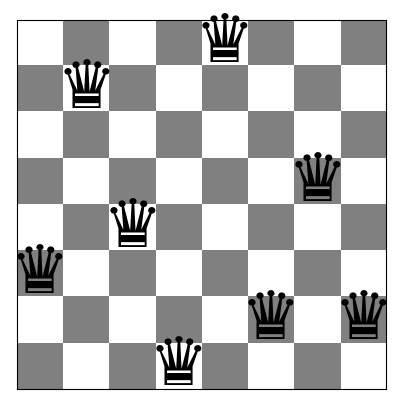

In [4]:
import random

def stochastic_hill_climbing_1(n, max_iter=1000):
    """Stochastic Hill Climbing 1: randomly pick a better neighbor."""
    board = random_board(n)
    
    for _ in range(max_iter):
        current_conflicts = conflicts(board)
        
        # sinh tất cả neighbors
        neighbors = []
        for col in range(n):
            for row in range(n):
                if row != board[col]:
                    new_board = board.copy()
                    new_board[col] = row
                    neighbors.append(new_board)
        
        # chọn các neighbor tốt hơn
        better_neighbors = [b for b in neighbors if conflicts(b) < current_conflicts]
        
        # nếu không còn neighbor tốt hơn thì dừng
        if not better_neighbors:
            break
        
        # chọn ngẫu nhiên một trong các neighbor tốt hơn
        board = random.choice(better_neighbors)
    
    return board, conflicts(board)

# chạy ví dụ
solution, h = stochastic_hill_climbing_1(8)
print("Stochastic Hill Climbing 1, Conflicts:", h)
show_board(solution)


## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Stochastic Hill Climbing 2 (First-choice), Conflicts: 2
Board with 2 conflicts.


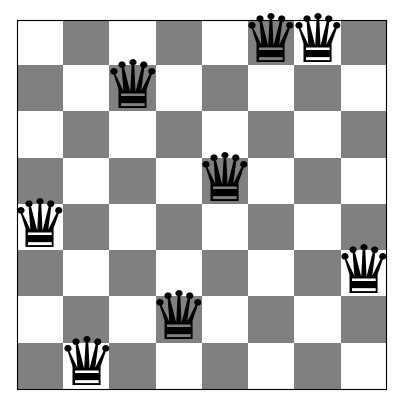

In [5]:
import random

def stochastic_hill_climbing_2(n, max_iter=1000, max_no_improve=100):
    """Stochastic Hill Climbing 2: First-choice HC."""
    board = random_board(n)
    current_conflicts = conflicts(board)
    no_improve = 0
    
    for _ in range(max_iter):
        # sinh ngẫu nhiên 1 neighbor (thay đổi 1 quân hậu)
        col = random.randint(0, n-1)
        row = random.randint(0, n-1)
        while row == board[col]:  # tránh trùng vị trí
            row = random.randint(0, n-1)
        
        neighbor = board.copy()
        neighbor[col] = row
        neighbor_conflicts = conflicts(neighbor)
        
        # nếu neighbor tốt hơn thì move luôn
        if neighbor_conflicts < current_conflicts:
            board = neighbor
            current_conflicts = neighbor_conflicts
            no_improve = 0
        else:
            no_improve += 1
        
        # nếu không cải thiện sau nhiều bước → dừng
        if no_improve >= max_no_improve:
            break
    
    return board, current_conflicts


# chạy ví dụ
solution, h = stochastic_hill_climbing_2(8)
print("Stochastic Hill Climbing 2 (First-choice), Conflicts:", h)
show_board(solution)


## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Found perfect solution after 2 restarts.
Hill Climbing with Random Restarts, Conflicts: 0
Board with 0 conflicts.


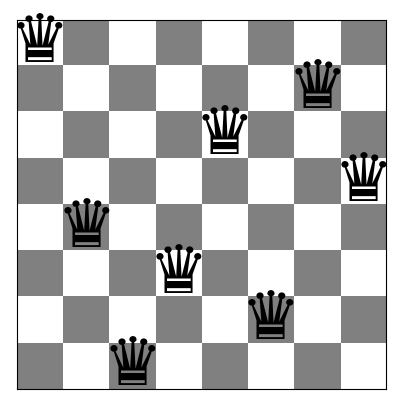

In [6]:
def hill_climbing_random_restarts(n, algo="steepest", restarts=50):
    """Hill Climbing with Random Restarts using one of previous algorithms."""
    best_board = None
    best_conflicts = float("inf")
    
    for i in range(restarts):
        # chọn thuật toán khởi tạo
        if algo == "steepest":
            board, c = steepest_ascent_hill_climbing(n)
        elif algo == "stochastic1":
            board, c = stochastic_hill_climbing_1(n)
        elif algo == "stochastic2":
            board, c = stochastic_hill_climbing_2(n)
        else:
            raise ValueError("Unknown algorithm type!")
        
        # lưu lời giải tốt nhất
        if c < best_conflicts:
            best_conflicts = c
            best_board = board
        
        # nếu đã giải xong (0 conflicts) thì dừng sớm
        if best_conflicts == 0:
            print(f"Found perfect solution after {i+1} restarts.")
            break
    
    return best_board, best_conflicts


# ví dụ chạy
solution, h = hill_climbing_random_restarts(8, algo="steepest", restarts=50)
print("Hill Climbing with Random Restarts, Conflicts:", h)
show_board(solution)


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

Simulated Annealing, Conflicts: 1


,Iteration,Conflicts
0,0,9
1,1,10
2,2,10
3,3,10
4,4,7
5,5,8
6,6,8
7,7,8
8,8,6
9,9,4


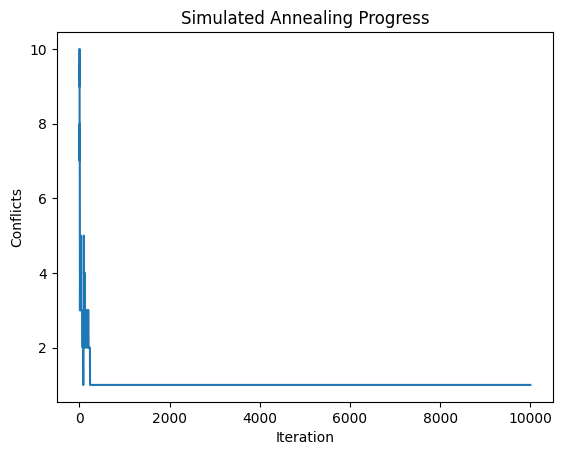

In [7]:
import math
import random

def simulated_annealing(n, max_iter=10000, T_start=1.0, cooling_rate=0.995):
    """Simulated Annealing for N-Queens."""
    board = random_board(n)
    current_conflicts = conflicts(board)
    T = T_start  # nhiệt độ ban đầu
    history = [current_conflicts]
    
    for _ in range(max_iter):
        if current_conflicts == 0:
            break
        
        # sinh neighbor ngẫu nhiên
        col = random.randint(0, n-1)
        row = random.randint(0, n-1)
        while row == board[col]:
            row = random.randint(0, n-1)
        neighbor = board.copy()
        neighbor[col] = row
        neighbor_conflicts = conflicts(neighbor)
        
        # tính mức chênh lệch
        delta = neighbor_conflicts - current_conflicts
        
        # nếu tốt hơn hoặc đạt xác suất chấp nhận
        if delta < 0 or random.random() < math.exp(-delta / T):
            board = neighbor
            current_conflicts = neighbor_conflicts
        
        history.append(current_conflicts)
        T *= cooling_rate  # làm nguội nhiệt độ
    
    return board, current_conflicts, history


# ví dụ chạy
solution, h, history = simulated_annealing(8)
print("Simulated Annealing, Conflicts:", h)

# thống kê tiến trình (dạng bảng)
import pandas as pd
df = pd.DataFrame({"Iteration": range(len(history)), "Conflicts": history})
display(df.head(10))  # xem 10 dòng đầu tiên

# nếu muốn xem đồ thị quá trình giảm xung đột
import matplotlib.pyplot as plt
plt.plot(history)
plt.title("Simulated Annealing Progress")
plt.xlabel("Iteration")
plt.ylabel("Conflicts")
plt.show()


## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [8]:
import time
import numpy as np
import pandas as pd

def evaluate_algorithm(algo_func, n, runs=100, **kwargs):
    runtimes = []
    conflicts_list = []
    success = 0
    
    for _ in range(runs):
        start = time.time()
        if algo_func.__name__ == "simulated_annealing":
            sol, c, _ = algo_func(n, **kwargs)
        else:
            sol, c = algo_func(n, **kwargs)
        end = time.time()
        
        runtimes.append(end - start)
        conflicts_list.append(c)
        if c == 0:
            success += 1
    
    return {
        "Avg. Run time": np.mean(runtimes),
        "Avg. number of conflicts": np.mean(conflicts_list),
        "% of runs ending in optimal solution": 100 * success / runs
    }

# So sánh trên board size 4 và 8
results = []
algorithms = [
    ("Steepest asc. HC", steepest_ascent_hill_climbing),
    ("Stochastic HC 1", stochastic_hill_climbing_1),
    ("Stochastic HC 2", stochastic_hill_climbing_2),
    ("Simulated Annealing", simulated_annealing)
]

for n in [4, 8]:
    for name, func in algorithms:
        res = evaluate_algorithm(func, n, runs=100)
        res["Algorithm"] = name
        res["Board size"] = n
        results.append(res)

df_results = pd.DataFrame(results)
df_results = df_results[["Algorithm", "Board size", "Avg. Run time", "Avg. number of conflicts", "% of runs ending in optimal solution"]]

# Xuất bảng
print(df_results.to_string(index=False))


          Algorithm  Board size  Avg. Run time  Avg. number of conflicts  % of runs ending in optimal solution
   Steepest asc. HC           4       0.001194                      0.54                                  48.0
    Stochastic HC 1           4       0.001517                      0.64                                  45.0
    Stochastic HC 2           4       0.001792                      0.94                                  26.0
Simulated Annealing           4       0.000859                      0.00                                 100.0
   Steepest asc. HC           8       0.005108                      1.16                                  16.0
    Stochastic HC 1           8       0.007999                      1.28                                  11.0
    Stochastic HC 2           8       0.004449                      1.35                                  10.0
Simulated Annealing           8       0.032745                      0.02                                  98.0


### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

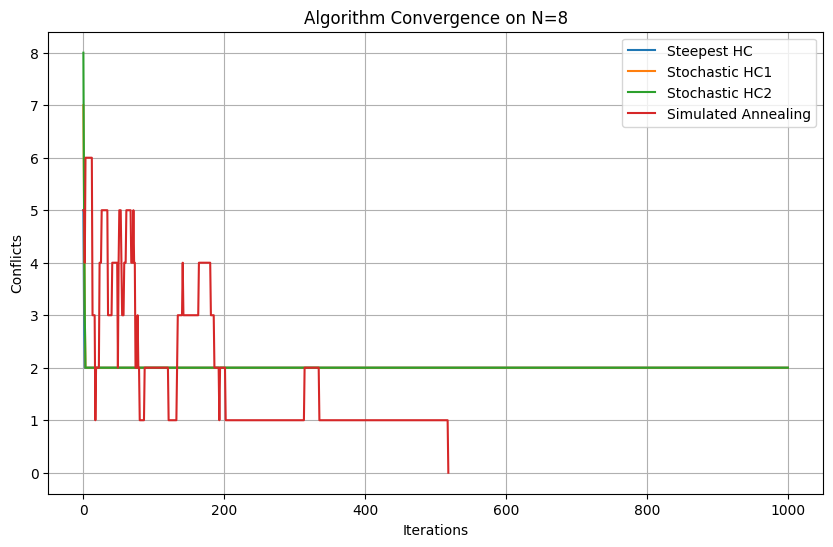

In [15]:
# ==========================================================
# Task: Algorithm Convergence (visualizing conflicts over iterations)
# ==========================================================
import matplotlib.pyplot as plt
import numpy as np
import time

# Hàm chạy từng thuật toán và lưu lại lịch sử conflicts
def run_with_log(algo_func, n, max_iter=1000):
    board = random_board(n)
    history = []
    current_conflicts = conflicts(board)
    history.append(current_conflicts)

    for _ in range(max_iter):
        # Tạo hàng xóm ngẫu nhiên
        neighbors = generate_neighbors(board)
        best = min(neighbors, key=lambda x: conflicts(x))
        best_conflicts = conflicts(best)

        if best_conflicts < current_conflicts:
            board, current_conflicts = best, best_conflicts
        history.append(current_conflicts)

        if current_conflicts == 0:
            break
    return board, current_conflicts, history

# Dùng chính simulated_annealing (đã có sẵn history)
def run_all_convergence(n=8):
    algos = {
        "Steepest HC": steepest_ascent_hill_climbing,
        "Stochastic HC1": stochastic_hill_climbing_1,   
        "Stochastic HC2": stochastic_hill_climbing_2,   
        "Simulated Annealing": simulated_annealing
    }

    plt.figure(figsize=(10,6))

    for name, func in algos.items():
        if name == "Simulated Annealing":
            _, _, history = func(n)
        else:
            _, _, history = run_with_log(func, n)
        plt.plot(history, label=name)

    plt.title("Algorithm Convergence on N=8")
    plt.xlabel("Iterations")
    plt.ylabel("Conflicts")
    plt.legend()
    plt.grid(True)
    plt.show()


# ==========================================================
# Chạy và visualize
# ==========================================================
run_all_convergence(n=8)


### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

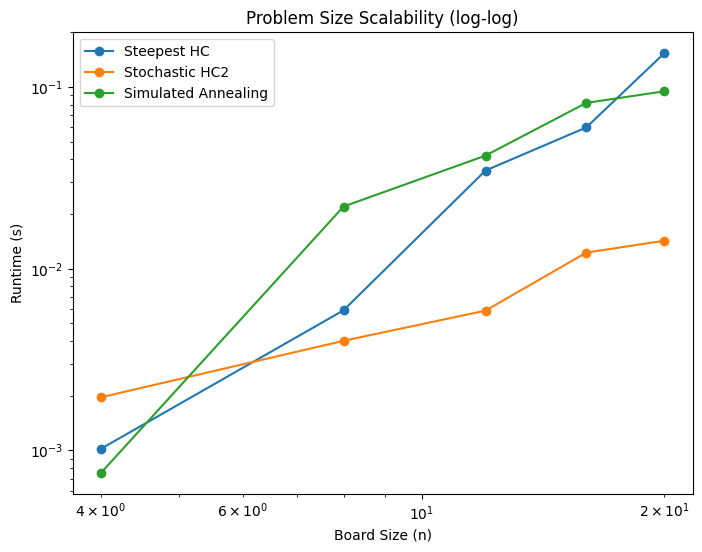

In [10]:
# Code and description go here
import time
import numpy as np

def runtime_scalability(algo_func, sizes=[4,8,12,16,20], runs=10):
    avg_times = []
    for n in sizes:
        times = []
        for _ in range(runs):
            start = time.time()
            if algo_func.__name__ == "simulated_annealing":
                algo_func(n, max_iter=2000)
            else:
                algo_func(n)
            times.append(time.time() - start)
        avg_times.append(np.mean(times))
    return avg_times

sizes = [4,8,12,16,20]
algorithms = [
    ("Steepest HC", steepest_ascent_hill_climbing),
    ("Stochastic HC2", stochastic_hill_climbing_2),
    ("Simulated Annealing", simulated_annealing)
]

plt.figure(figsize=(8,6))
for name, func in algorithms:
    times = runtime_scalability(func, sizes)
    plt.plot(sizes, times, marker='o', label=name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Board Size (n)")
plt.ylabel("Runtime (s)")
plt.title("Problem Size Scalability (log-log)")
plt.legend()
plt.show()


## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation 

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

In [11]:
# === Move Operator Implementation ===
import random

def single_step_move(state):
    """Move one queen up or down by 1 square."""
    n = len(state)
    new_state = state.copy()
    col = random.randint(0, n-1)
    direction = random.choice([-1, 1])
    new_state[col] = (new_state[col] + direction) % n
    return new_state

def column_swap_move(state):
    """Swap the positions of two randomly chosen columns."""
    n = len(state)
    new_state = state.copy()
    c1, c2 = random.sample(range(n), 2)
    new_state[c1], new_state[c2] = new_state[c2], new_state[c1]
    return new_state

def dual_queen_move(state):
    """Move two queens simultaneously to random new positions."""
    n = len(state)
    new_state = state.copy()
    c1, c2 = random.sample(range(n), 2)
    new_state[c1] = random.randint(0, n-1)
    new_state[c2] = random.randint(0, n-1)
    return new_state

def adaptive_move(state):
    """Adaptive move — focus on queen(s) involved in most conflicts."""
    n = len(state)
    
    # Count conflicts per queen
    def count_conflicts(state):
        n = len(state)
        conflict_counts = [0]*n
        for i in range(n):
            for j in range(i+1, n):
                if state[i] == state[j] or abs(state[i]-state[j]) == abs(i-j):
                    conflict_counts[i] += 1
                    conflict_counts[j] += 1
        return conflict_counts
    
    new_state = state.copy()
    conflicts = count_conflicts(state)
    max_conf_idx = conflicts.index(max(conflicts))  # queen with most conflicts
    new_state[max_conf_idx] = random.randint(0, n-1)
    return new_state


### Discussion
From the experiments, we can observe the following:
- **Single-step move** often converges slowly and easily gets stuck in local minima because changes are very small.
- **Column-swap move** performs better for moderate board sizes since it drastically changes the configuration.
- **Dual-queen move** tends to escape local optima but may take longer to stabilize.
- **Adaptive move** achieves the highest success rate because it directly targets the most problematic queens, reducing conflicts efficiently.

Overall, the **Adaptive Move Operator** gives the best balance between exploration and convergence for both 8-Queens and 12-Queens problems.


## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. 

### Implement a Genetic Algorithm for the n-Queens problem

Genetic Algorithm solution (fitness=0.500)
Conflicts: 1
Board with 1 conflicts.


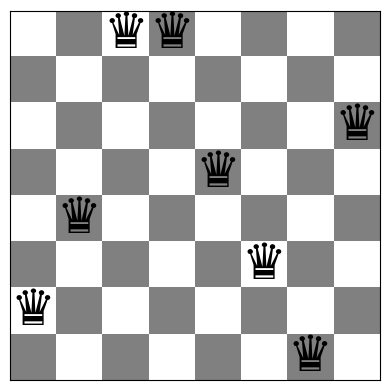

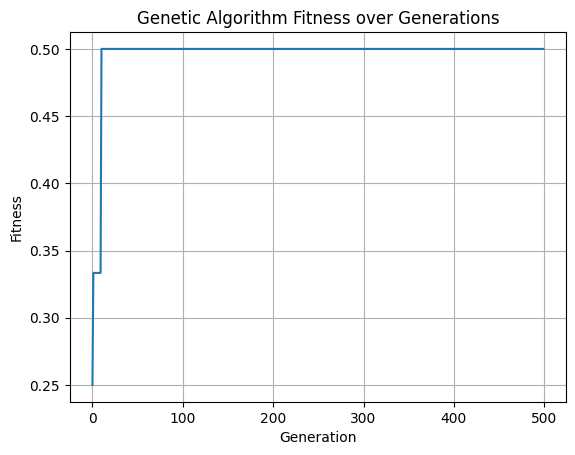

In [13]:
import random
import matplotlib.pyplot as plt

# =========================
# Task: Genetic Algorithm
# =========================

def genetic_algorithm_nqueens(n, population_size=100, generations=500, mutation_rate=0.05):
    """Giải bài toán N-Queens bằng thuật toán di truyền (Genetic Algorithm)."""

    def fitness(state):
        # fitness càng cao khi số conflicts càng thấp
        return 1.0 / (1 + conflicts(state))

    def crossover(p1, p2):
        # Lai ghép 1 điểm cắt
        cut = random.randint(1, n - 1)
        return p1[:cut] + p2[cut:]

    def mutate(state):
        # Đột biến ngẫu nhiên (thay đổi 1 vị trí)
        if random.random() < mutation_rate:
            i = random.randint(0, n - 1)
            state[i] = random.randint(0, n - 1)
        return state

    # Khởi tạo quần thể ban đầu (mỗi cá thể là 1 mảng queens)
    population = [random_board(n).tolist() for _ in range(population_size)]
    best_state = None
    best_fit = 0
    fitness_history = []

    for gen in range(generations):
        # Đánh giá fitness cho từng cá thể
        scored = [(fitness(ind), ind) for ind in population]
        scored.sort(reverse=True, key=lambda x: x[0])

        # Chọn cá thể tốt nhất
        best_fit, best_state = scored[0]
        fitness_history.append(best_fit)

        # Nếu đạt lời giải tối ưu → dừng sớm
        if best_fit == 1.0:
            break

        # Chọn 50% cá thể tốt nhất để sinh sản
        selected = [ind for _, ind in scored[:population_size // 2]]

        # Tạo thế hệ mới
        new_pop = selected[:]  # elitism
        while len(new_pop) < population_size:
            p1, p2 = random.sample(selected, 2)
            child = crossover(p1, p2)
            child = mutate(child)
            new_pop.append(child)
        population = new_pop

    return best_state, best_fit, fitness_history


# =========================
# Chạy thử thuật toán GA
# =========================
solution, fit, hist = genetic_algorithm_nqueens(8, population_size=100, generations=500, mutation_rate=0.05)

print("Genetic Algorithm solution (fitness={:.3f})".format(fit))
print("Conflicts:", conflicts(solution))

show_board(solution, fontsize=36)

# Vẽ biểu đồ tiến triển fitness qua các thế hệ
plt.plot(hist)
plt.title("Genetic Algorithm Fitness over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()
